## Punto 2

    2. Entren a la pagina https://www.indec.gob.ar/ y vayan a la sección Servicios y Herramientas -> Bases de datos. Descarguen la base de microdatos de la Encuesta Permanente de Hogares (EPH) correspondiente al primer trimestre de 2004 y 2024 en formato .dta y .xls, respectivamente (una vez descargadas, las bases a usar son Individual_t104.dta y usu_individual_T124.xls). En la pagina web, también encontrara un diccionario de variables con el nombre de “Diseño de registro y estructura para las bases preliminares (hogares y personas)”. Descarguen el diccionario de cada año. En estos archivos se les indica qué significa cada variable que aparece en la base de datos, en particular, en la sección de Diseño de registros de la base Personas.
        a. Eliminen todas las observaciones que no corresponden a los aglomerados de Ciudad Autónoma de Buenos Aires (CABA) o Partidos del Gran Buenos Aires, y unan ambos trimestres en una sola base.
        b. Si hay observaciones con valores que no tienen sentido, descártenlas (por ejemplo, ingresos y edades negativos). Expliquen las decisiones tomadas.
        c. Una vez hecha esa limpieza, realicen un gráfico de barras mostrando la composición por sexo para 2004 y 2024. Comenten los resultados.
        d. Realicen una matriz de correlación para 2004 y 2024 con las siguientes variables: CH04, CH06, CH07, CH08, NIVEL ED, ESTADO, CAT_INAC, IPCF. Utilicen alguno de los comandos disponibles en este link o este link para graficar la matriz de correlación. Comenten los resultados.1
        e. ¿Cuántos desocupados hay en la muestra? ¿Cuántos inactivos? ¿Cuál es la media de ingreso per cápita familiar (IPCF) según estado (ocupado, desocupado, inactivo)?

In [ ]:
import pandas as pd

# URLs directas de los archivos en GitHub
url_2004 = "https://github.com/JorgeJimenezT/Big-Data-UBA---Jimenez-Menendez-Nunez/raw/refs/heads/main/TP3/Individual_t104.dta"
url_2024 = "https://github.com/JorgeJimenezT/Big-Data-UBA---Jimenez-Menendez-Nunez/raw/refs/heads/main/TP3/usu_individual_T124.xlsx"

# Leer los archivos directamente desde GitHub
data_2004 = pd.read_stata(url_2004)
data_2024 = pd.read_excel(url_2024)

data_2004['Year'] = 2004
data_2024['Year'] = 2024

print(data_2004.head())
print(data_2024.head())


     CODUSU  nro_hogar componente h15    ano4       trimestre  \
0  125098          1.0        1.0  Sí  2004.0  1er. Trimestre   
1  125397          1.0        1.0  Sí  2004.0  1er. Trimestre   
2  125515          1.0        1.0  Sí  2004.0  1er. Trimestre   
3  125558          1.0        1.0  Sí  2004.0  1er. Trimestre   
4  125558          1.0        2.0  Sí  2004.0  1er. Trimestre   

              region mas_500              aglomerado  pondera  ... ideccfr  \
0  Gran Buenos Aires       S  Ciudad de Buenos Aires   1299.0  ...           
1  Gran Buenos Aires       S  Ciudad de Buenos Aires   2018.0  ...           
2  Gran Buenos Aires       S  Ciudad de Buenos Aires   1486.0  ...           
3  Gran Buenos Aires       S  Ciudad de Buenos Aires   1674.0  ...           
4  Gran Buenos Aires       S  Ciudad de Buenos Aires   1674.0  ...           

  rdeccfr gdeccfr pdeccfr adeccfr pj1_1 pj2_1 pj3_1 idimpp  Year  
0      06      06              04   0.0   0.0   0.0  00000  2004  
1     

In [ ]:
import pandas as pd

# Diccionario de mapeo para homologar las columnas
# Formato: {'nombre_actual_en_2004': 'nombre_actual_en_2024'}
column_mapping = {
    'ano4': 'ANO4',
    'nro_hogar': 'NRO_HOGAR',
    'componente': 'COMPONENTE',
    'h15': 'H15',
    'ch04': 'CH04',
    'region': 'REGION',
    'mas_500': 'MAS_500',
    'aglomerado': 'AGLOMERADO',
    'pondera': 'PONDERA',
    'ch03': 'CH03',
    'ch04': 'CH04',
    'ch06': 'CH06',
    'ch07': 'CH07',
    'ch08': 'CH08',
    'nivel_ed': 'NIVEL_ED',
    'estado': 'ESTADO',
    'cat_ocup': 'CAT_OCUP',
    'cat_inac': 'CAT_INAC',
    'ipcf': 'IPCF'
    # Agrega más columnas según sea necesario
}


# Renombrar las columnas de la base 2004 usando el diccionario
data_2004_renamed = data_2004.rename(columns=column_mapping)

# Verificar si las columnas coinciden
print("Columnas en 2004 después del mapeo:", data_2004_renamed.columns)
print("Columnas en 2024:", data_2024.columns)

# Concatenar las bases de datos
data_combined = pd.concat([data_2004_renamed, data_2024], ignore_index=True)

# Verificar las dimensiones y una muestra de los datos combinados
print("Dimensiones de la base combinada:", data_combined.shape)
print(data_combined.head())


# Diccionario de mapeo: nombres a códigos
aglomerado_mapping = {
    "Gran La Plata": 2,
    "Bahía Blanca - Cerri": 3,
    "Gran Rosario": 4,
    "Gran Santa Fe": 5,
    "Gran Paraná": 6,
    "Posadas": 7,
    "Gran Resistencia": 8,
    "Cdro. Rivadavia – Rada Tilly": 9,
    "Gran Mendoza": 10,
    "Corrientes": 12,
    "Gran Córdoba": 13,
    "Concordia": 14,
    "Formosa": 15,
    "Neuquén – Plottier": 17,
    "S.del Estero - La Banda": 18,
    "Jujuy - Palpalá": 19,
    "Río Gallegos": 20,
    "Gran Catamarca": 22,
    "Salta": 23,
    "La Rioja": 25,
    "San Luis - El Chorrillo": 26,
    "Gran San Juan": 27,
    "Gran Tucumán - T. Viejo": 29,
    "Santa Rosa - Toay": 30,
    "Ushuaia - Río Grande": 31,
    "Ciudad de Buenos Aires": 32,
    "Partidos del GBA": 33,
    "Mar del Plata - Batán": 34,
    "Río Cuarto": 36
}

# Reemplazar nombres por códigos en la columna 'AGLOMERADO'
data_combined['AGLOMERADO'] = data_combined['AGLOMERADO'].replace(aglomerado_mapping)

# Asegurarse de que todos los valores sean numéricos
data_combined['AGLOMERADO'] = pd.to_numeric(data_combined['AGLOMERADO'], errors='coerce')

# Verificar los valores únicos después de la transformación
print("Valores únicos en AGLOMERADO después de la homologación:")
print(data_combined['AGLOMERADO'].unique())




Columnas en 2004 después del mapeo: Index(['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'ANO4', 'trimestre',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA',
       ...
       'ideccfr', 'rdeccfr', 'gdeccfr', 'pdeccfr', 'adeccfr', 'pj1_1', 'pj2_1',
       'pj3_1', 'idimpp', 'Year'],
      dtype='object', length=177)
Columnas en 2024: Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA',
       ...
       'ADECIFR', 'IPCF', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR', 'PDECCFR',
       'ADECCFR', 'PONDIH', 'Year'],
      dtype='object', length=178)
Dimensiones de la base combinada: (91339, 335)
     CODUSU  NRO_HOGAR COMPONENTE H15    ANO4       trimestre  \
0  125098          1.0        1.0  Sí  2004.0  1er. Trimestre   
1  125397          1.0        1.0  Sí  2004.0  1er. Trimestre   
2  125515          1.0        1.0  Sí  2004.0  1er. Trimestre   
3  125558          1.0        1.0  Sí  2004.0  1er. Trimestre   
4 

In [ ]:
# Usar .unique() para obtener valores únicos
if 'AGLOMERADO' in data_combined.columns:
    distinct_aglomerados = data_combined['AGLOMERADO'].unique()
    print("Valores únicos en AGLOMERADO:")
    print(distinct_aglomerados)
else:
    print("La columna 'AGLOMERADO' no existe en el DataFrame.")



Valores únicos en AGLOMERADO:
[32. 33. nan 19. 22. 23. 25.  7.  8. 12. 15. 10. 26. 27.  2.  3.  4.  5.
  6. 13. 14. 30. 34. 36. 20. 31. 18. 29. 93. 91.  9. 17. 38.]


In [ ]:
# Agrupar por AGLOMERADO y ano04, y contar las filas
resultado = data_combined.groupby(['AGLOMERADO', 'ANO4']).size().reset_index(name='count')

# Mostrar el resultado
print(resultado)


    AGLOMERADO    ANO4  count
0          2.0  2004.0   1730
1          2.0  2024.0   1040
2          3.0  2004.0   1156
3          3.0  2024.0   1008
4          4.0  2004.0   2465
5          4.0  2024.0   1679
6          5.0  2004.0   1421
7          5.0  2024.0   1332
8          6.0  2004.0   1166
9          6.0  2024.0   1401
10         7.0  2004.0   1453
11         7.0  2024.0   1193
12         8.0  2004.0   1575
13         8.0  2024.0   1339
14         9.0  2024.0    871
15        10.0  2004.0   2357
16        10.0  2024.0   1849
17        12.0  2004.0   1337
18        12.0  2024.0   1038
19        13.0  2004.0   2792
20        13.0  2024.0   2169
21        14.0  2004.0    966
22        14.0  2024.0   1373
23        15.0  2004.0    978
24        15.0  2024.0   1280
25        17.0  2024.0   1160
26        18.0  2024.0   1356
27        19.0  2004.0   1315
28        19.0  2024.0   1464
29        20.0  2004.0    844
30        20.0  2024.0    635
31        22.0  2004.0   1005
32        

In [ ]:
# Usar .unique() para obtener valores únicos (similar a SELECT DISTINCT)
if 'ANO4' in data_combined.columns:
    distinct_anos = data_combined['ANO4'].unique()
    print("Valores únicos en ANO4:")
    print(distinct_anos)
elif 'ano4' in data_combined.columns:
    distinct_anos = data_combined['ano4'].unique()
    print("Valores únicos en ano4:")
    print(distinct_anos)
else:
    print("La columna 'ANO4' o 'ano4' no existe en el DataFrame.")


Valores únicos en ANO4:
[2004. 2024.]


In [ ]:
# Filtrar para considerar solo los aglomerados 32 y 33

resultado_limpio = data_combined[pd.to_numeric(data_combined['AGLOMERADO'], errors='coerce').notnull()]
data_combined['AGLOMERADO'] = resultado_limpio['AGLOMERADO'].astype(int)
resultado_filtrado = resultado_limpio[data_combined['AGLOMERADO'].isin([32, 33])]




<ipython-input-34-d3a3fac65074>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  resultado_filtrado = resultado_limpio[data_combined['AGLOMERADO'].isin([32, 33])]


In [ ]:
# Filtrar observaciones con ingresos y edades no válidas


# Convertir IPCF y CH06 a numéricos
data_combined['IPCF'] = pd.to_numeric(data_combined['IPCF'], errors='coerce')
data_combined['CH06'] = pd.to_numeric(data_combined['CH06'], errors='coerce')
data_combined = data_combined.dropna(subset=['IPCF', 'CH06'])


# Filtrar observaciones con ingresos y edades no válidas
data_combined_clean = data_combined[
    (data_combined['IPCF'] > -1) &  # Ingresos no negativos
    (data_combined['CH06'] > 0)     # Edades no negativas
]

# Verificar dimensiones antes y después de la limpieza
print(f"Dimensiones antes de la limpieza: {resultado_filtrado.shape}")
print(f"Dimensiones después de la limpieza: {resultado_filtrado.shape}")


Dimensiones antes de la limpieza: (14698, 335)
Dimensiones después de la limpieza: (14698, 335)


In [ ]:
# ====================================
# Diccionarios de mapeo para homologar valores
# ====================================
sexo_mapping = {
    1: 'Varón',
    2: 'Mujer',
    'Varón': 'Varón',
    'Mujer': 'Mujer'
}


ch04_mapping = {
    1: 'Varón',
    2: 'Mujer',
}

ch07_mapping = {
    1: 'Unido',
    2: 'Casado',
    3: 'Separado o Divorciado',
    4: 'Viudo',
    5: 'Soltero'
}

ch08_mapping = {
    1: 'Obra Social (incluye PAMI)',
    2: 'Mutual / Prepaga / Servicio de emergencia',
    3: 'Planes y Seguros Públicos',
    4: 'No paga ni le descuentan',
    9: 'Ns./Nr.',
    12: 'Obra Social y Mutual / Prepaga / Servicio de emergencia',
    13: 'Obra Social y Planes y Seguros Públicos',
    23: 'Mutual / Prepaga / Servicio de emergencia y Planes y Seguros Públicos',
    123: 'Obra Social, Mutual / Prepaga / Servicio de emergencia y Planes y Seguros Públicos'
}

nivel_ed_mapping = {
    1: 'Primaria Incompleta',
    2: 'Primaria Completa',
    3: 'Secundaria Incompleta',
    4: 'Secundaria Completa',
    5: 'Superior Universitaria Incompleta',
    6: 'Superior Universitaria Completa',
    7: 'Sin Instrucción',
    9: 'Ns/Nr'
}

estado_mapping = {
    0: 'Entrevista no realizada',
    1: 'Ocupado',
    2: 'Desocupado',
    3: 'Inactivo',
    4: 'Menor de 10 años'
}

cat_inac_mapping = {
    1: 'Jubilado / Pensionado',
    2: 'Rentista',
    3: 'Estudiante',
    4: 'Ama de casa',
    5: 'Menor de 6 años',
    6: 'Discapacitado',
    7: 'Otros'
}


# ====================================
# Operaciones de mapeo y creación de columnas
# ====================================

# Mapeo y verificación para CH04
data_combined_clean['CH04'] = data_combined_clean['CH04'].replace(sexo_mapping)
print("Valores únicos en CH04 después de la homologación:")
print(data_combined_clean['CH04'].unique())

# Mapeo y creación de columnas para CH04
reverse_ch04_mapping = {v: k for k, v in ch04_mapping.items()}
data_combined_clean['CH04NUM'] = data_combined_clean['CH04'].map(reverse_ch04_mapping)


# Mapeo y creación de columnas para CH07
data_combined_clean['CH07_DESC'] = data_combined_clean['CH07'].replace(ch07_mapping)
print("Valores únicos en CH07_DESC después del mapeo:")
print(data_combined_clean['CH07_DESC'].unique())

reverse_ch07_mapping = {v: k for k, v in ch07_mapping.items()}
data_combined_clean['CH07NUM'] = data_combined_clean['CH07_DESC'].map(reverse_ch07_mapping)

data_combined_clean['CH08_DESC'] = data_combined_clean['CH08'].replace(ch08_mapping)
print("Valores únicos en CH08_DESC después del mapeo:")
print(data_combined_clean['CH08_DESC'].unique())

reverse_ch08_mapping = {v: k for k, v in ch08_mapping.items()}
data_combined_clean['CH08NUM'] = data_combined_clean['CH08_DESC'].map(reverse_ch08_mapping)


# Mapeo y creación de columnas para NIVEL_ED
data_combined_clean['NIVEL_ED_DESC'] = data_combined_clean['NIVEL_ED'].replace(nivel_ed_mapping)
print("Valores únicos en NIVEL_ED_DESC después del mapeo:")
print(data_combined_clean['NIVEL_ED_DESC'].unique())

reverse_nivel_ed_mapping = {v: k for k, v in nivel_ed_mapping.items()}
data_combined_clean['NIVEL_ED_NUM'] = data_combined_clean['NIVEL_ED_DESC'].map(reverse_nivel_ed_mapping)

# Mapeo y creación de columnas para ESTADO
data_combined_clean['ESTADO_DESC'] = data_combined_clean['ESTADO'].replace(estado_mapping)
print("Valores únicos en ESTADO_DESC después del mapeo:")
print(data_combined_clean['ESTADO_DESC'].unique())

reverse_estado_mapping = {v: k for k, v in estado_mapping.items()}
data_combined_clean['ESTADO_NUM'] = data_combined_clean['ESTADO_DESC'].map(reverse_estado_mapping)

# Mapeo y creación de columnas para CAT_INAC
data_combined_clean['CAT_INAC_DESC'] = data_combined_clean['CAT_INAC'].replace(cat_inac_mapping)
print("Valores únicos en CAT_INAC_DESC después del mapeo:")
print(data_combined_clean['CAT_INAC_DESC'].unique())

reverse_cat_inac_mapping = {v: k for k, v in cat_inac_mapping.items()}
data_combined_clean['CAT_INAC_NUM'] = data_combined_clean['CAT_INAC_DESC'].map(reverse_cat_inac_mapping)




Valores únicos en CH04 después de la homologación:
['Varón' 'Mujer']
Valores únicos en CH07_DESC después del mapeo:
['Viudo' 'Separado o divorciado' 'Casado' 'Soltero' 'Unido' 'Ns./Nr.'
 'Separado o Divorciado' 9]


<ipython-input-36-9c5e4367485b>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_combined_clean['CH04'] = data_combined_clean['CH04'].replace(sexo_mapping)
<ipython-input-36-9c5e4367485b>:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_combined_clean['CH04NUM'] = data_combined_clean['CH04'].map(reverse_ch04_mapping)
<ipython-input-36-9c5e4367485b>:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

Valores únicos en CH08_DESC después del mapeo:
['Obra social (incluye PAMI)' 'No paga ni le descuentan'
 'Mutual/Prepaga/Servicio de emergencia'
 'Obra social y mutual/prepaga/servicio de emergencia'
 'Planes y seguros públicos' 'Ns./Nr.'
 'Mutual/prepaga/servicio de emergencia/planes y seguros públi'
 'Obra social y planes y seguros públicos'
 'Obra social, mutual/prepaga/servicio de emergencia y planes'
 'Obra Social (incluye PAMI)'
 'Obra Social y Mutual / Prepaga / Servicio de emergencia'
 'Planes y Seguros Públicos' 'Mutual / Prepaga / Servicio de emergencia'
 'Obra Social y Planes y Seguros Públicos'
 'Mutual / Prepaga / Servicio de emergencia y Planes y Seguros Públicos'
 'Obra Social, Mutual / Prepaga / Servicio de emergencia y Planes y Seguros Públicos']
Valores únicos en NIVEL_ED_DESC después del mapeo:
['Secundaria Incompleta' 'Primaria Completa'
 'Superior Universitaria Completa' 'Superior Universitaria Incompleta'
 'Secundaria Completa' 'Primaria Incompleta (incluye educac

<ipython-input-36-9c5e4367485b>:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_combined_clean['NIVEL_ED_DESC'] = data_combined_clean['NIVEL_ED'].replace(nivel_ed_mapping)
<ipython-input-36-9c5e4367485b>:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_combined_clean['NIVEL_ED_NUM'] = data_combined_clean['NIVEL_ED_DESC'].map(reverse_nivel_ed_mapping)
<ipython-input-36-9c5e4367485b>:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

Valores únicos en 'ANO4': [2004. 2024.]


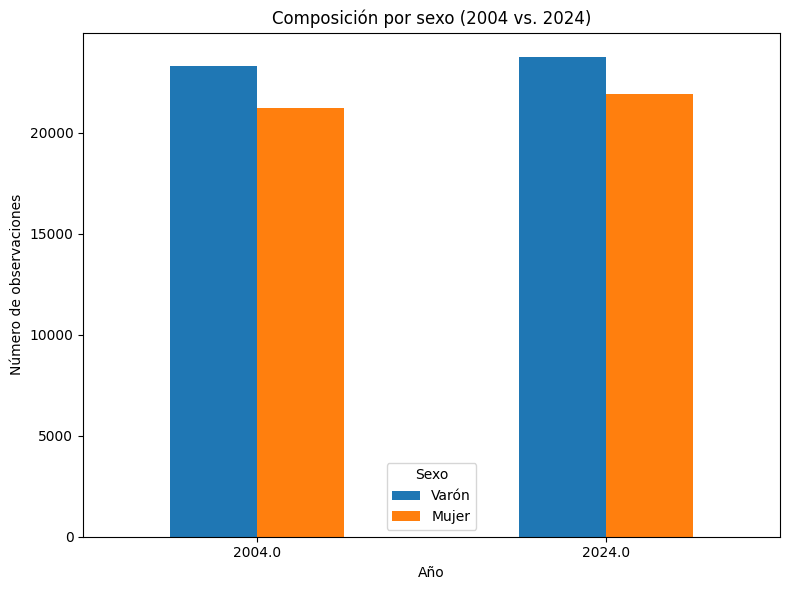

In [ ]:
#gráfico por año y sexo

import matplotlib.pyplot as plt

print("Valores únicos en 'ANO4':", data_combined_clean['ANO4'].unique())



# Agrupar por año y sexo
sexo_composicion = data_combined_clean.groupby(['ANO4', 'CH04']).size().unstack()

# Renombrar los valores de CH04 (1: Varón, 2: Mujer)
sexo_composicion.columns = ['Varón', 'Mujer']

# Gráfico de barras
sexo_composicion.plot(kind='bar', figsize=(8, 6))
plt.title("Composición por sexo (2004 vs. 2024)")
plt.ylabel("Número de observaciones")
plt.xlabel("Año")
plt.xticks(rotation=0)
plt.legend(title="Sexo")
plt.tight_layout()
plt.show()


In [ ]:
print(data_combined_clean)


# Guardar el DataFrame como un archivo CSV
data_combined_clean.to_csv("data_combined_clean4.csv", index=False)


                              CODUSU  NRO_HOGAR COMPONENTE H15    ANO4  \
0                           125098          1.0        1.0  Sí  2004.0   
1                           125397          1.0        1.0  Sí  2004.0   
2                           125515          1.0        1.0  Sí  2004.0   
3                           125558          1.0        1.0  Sí  2004.0   
4                           125558          1.0        2.0  Sí  2004.0   
...                              ...        ...        ...  ..     ...   
91334  TQRMNOPUQHKMKNCDEIJAH00861661        1.0          1   1  2024.0   
91335  TQRMNOPUQHKMKNCDEIJAH00861661        1.0          2   2  2024.0   
91336  TQRMNOPUQHKMKNCDEIJAH00861661        1.0          3   2  2024.0   
91337  TQRMNOPUQHKMKNCDEIJAH00861661        1.0          4   2  2024.0   
91338  TQRMNOPUQHKMKNCDEIJAH00861661        1.0          5   2  2024.0   

            trimestre             REGION MAS_500  AGLOMERADO  PONDERA  ...  \
0      1er. Trimestre  Gran Bueno

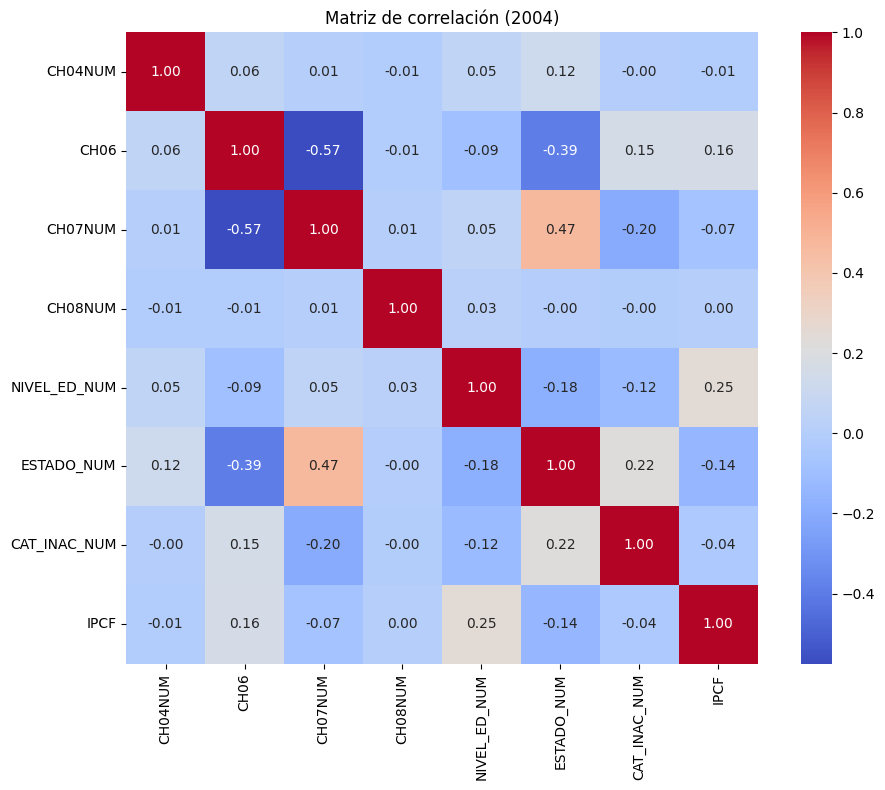

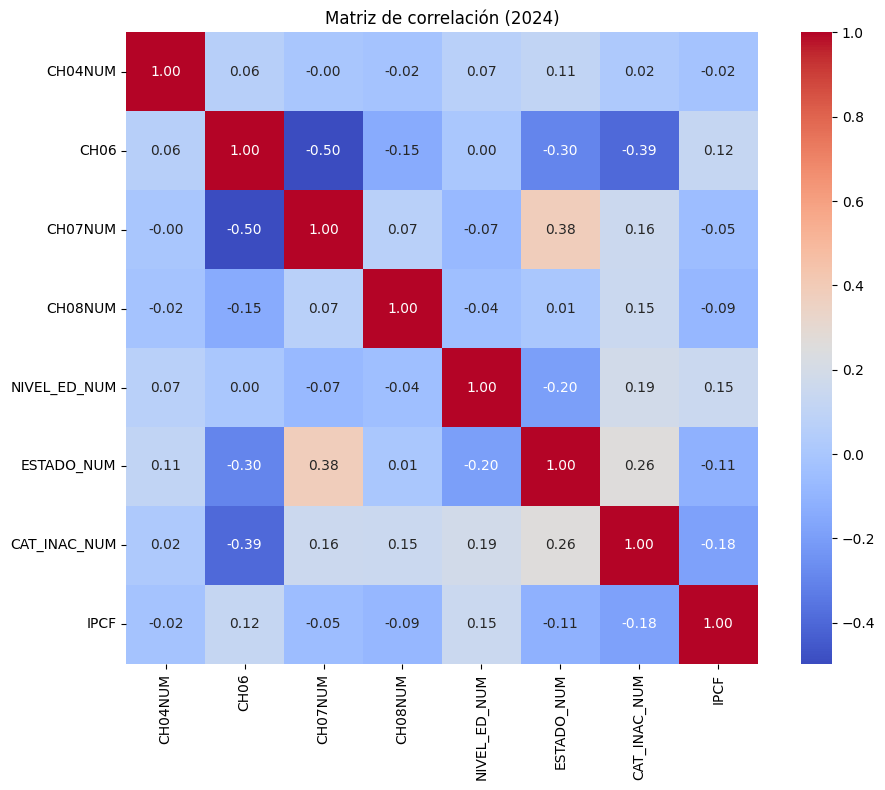

In [ ]:
#Matriz de correlación
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar el dataset para 2004 y 2024 y seleccionar las columnas relevantes
variables = ['CH04NUM', 'CH06', 'CH07NUM', 'CH08NUM', 'NIVEL_ED_NUM', 'ESTADO_NUM', 'CAT_INAC_NUM', 'IPCF']

# Crear datasets separados por año
data_2004 = data_combined_clean[data_combined_clean['ANO4'] == 2004][variables]
data_2024 = data_combined_clean[data_combined_clean['ANO4'] == 2024][variables]

# Calcular matrices de correlación
correlation_2004 = data_2004.corr()
correlation_2024 = data_2024.corr()

# Función para graficar la matriz de correlación
def plot_correlation_matrix(corr_matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Graficar matrices de correlación
plot_correlation_matrix(correlation_2004, "Matriz de correlación (2004)")
plot_correlation_matrix(correlation_2024, "Matriz de correlación (2024)")


In [ ]:
print(data_2024)


       CH04NUM  CH06  CH07NUM  CH08NUM  NIVEL_ED_NUM  ESTADO_NUM  \
45289        2  44.0      5.0      1.0           3.0         1.0   
45290        2  22.0      5.0      1.0           5.0         3.0   
45291        2   3.0      5.0      1.0           7.0         4.0   
45292        1  54.0      2.0      1.0           4.0         1.0   
45293        2  53.0      2.0      4.0           4.0         1.0   
...        ...   ...      ...      ...           ...         ...   
91334        2  43.0      3.0      1.0           3.0         1.0   
91335        1  21.0      5.0      1.0           3.0         0.0   
91336        1  20.0      5.0      1.0           3.0         0.0   
91337        1  11.0      5.0      1.0           3.0         0.0   
91338        2  24.0      5.0      1.0           5.0         0.0   

       CAT_INAC_NUM      IPCF  
45289           NaN       0.0  
45290           4.0       0.0  
45291           5.0       0.0  
45292           NaN  212500.0  
45293           NaN  21

In [ ]:
#Cantidad de desocupados

# Contar el número de desocupados e inactivos
desocupados_count = data_combined_clean[data_combined_clean['ESTADO_NUM'] == 2].shape[0]
inactivos_count = data_combined_clean[data_combined_clean['ESTADO_NUM'] == 3].shape[0]

# Calcular la media del ingreso per cápita familiar (IPCF) según estado (1: Ocupado, 2: Desocupado, 3: Inactivo)
ipcf_mean_by_estado = data_combined_clean[data_combined_clean['ESTADO_NUM'].isin([1, 2, 3])].groupby('ESTADO_NUM')['IPCF'].mean()

# Mostrar resultados
print(f"Cantidad de Desocupados: {desocupados_count}")
print(f"Cantidad de Inactivos: {inactivos_count}")
print("Media del IPCF por Estado (1: Ocupado, 2: Desocupado, 3: Inactivo):")
print(ipcf_mean_by_estado)


Cantidad de Desocupados: 4079
Cantidad de Inactivos: 36412
Media del IPCF por Estado (1: Ocupado, 2: Desocupado, 3: Inactivo):
ESTADO_NUM
1.0    103540.282860
2.0     32842.648828
3.0     73134.280587
Name: IPCF, dtype: float64


In [ ]:
print(data_combined_clean['ESTADO_NUM'].head())

0    3.0
1    1.0
2    3.0
3    1.0
4    3.0
Name: ESTADO_NUM, dtype: float64


## Punto 3

Uno de los grandes problemas de la EPH es la creciente cantidad de hogares que no reportan sus ingresos (ver por ejemplo el siguiente informe). ¿Cuántas personas no respondieron cual es su condición de actividad? Guarden como una base distinta llamada respondieron las observaciones donde respondieron la pregunta sobre su condición de actividad (ESTADO). Las observaciones con ESTADO=0 guárdenlas en una base bajo el nombre norespondieron.

In [ ]:
# Separar las observaciones según la condición de actividad
respondieron = data_combined_clean[data_combined_clean['ESTADO_NUM'] != 0]
norespondieron = data_combined_clean[data_combined_clean['ESTADO_NUM'] == 0]

# Resultado
print(f"No respondieron su condición de actividad: {norespondieron.shape[0]} encuestados")

No respondieron su condición de actividad: 81 encuestados


## Punto 4

Agreguen a la base respondieron una columna llamada PEA (Población Económicamente Activa) que tome 1 si están ocupados o desocupados en ESTADO. Realicen un gráfico de barras mostrando la composición por PEA para 2004 y 2024. Comenten los resultados.

     ANO4  ESTADO_NUM  PEA
0  2004.0         3.0    0
1  2004.0         1.0    1
2  2004.0         3.0    0
3  2004.0         1.0    1
4  2004.0         3.0    0


<ipython-input-44-8631a68fb82e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['PEA'] = respondieron['ESTADO_NUM'].apply(lambda x: 1 if x in [1, 2] else 0)


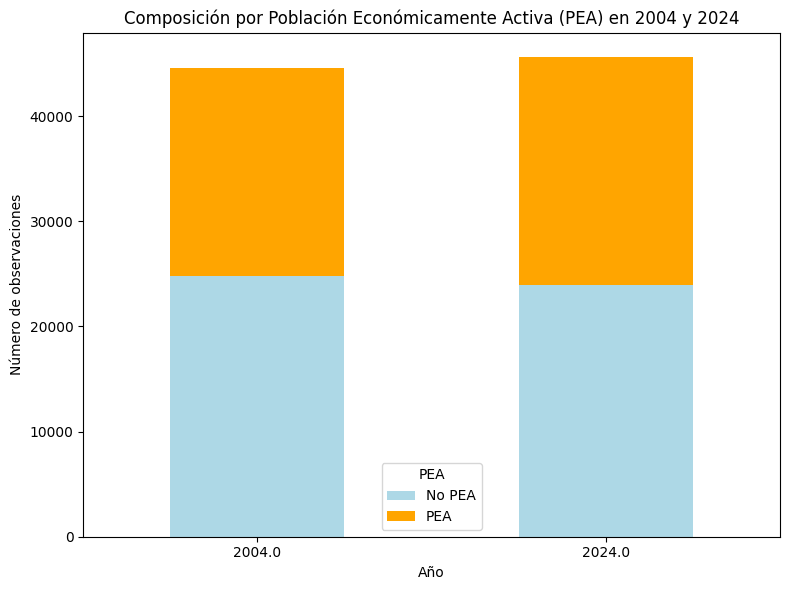

In [ ]:
# Se agrega columna PEA (Población Económicamente Activa)
respondieron['PEA'] = respondieron['ESTADO_NUM'].apply(lambda x: 1 if x in [1, 2] else 0)

# Verificar las primeras filas para asegurar que la columna 'PEA' fue agregada correctamente
print(respondieron[['ANO4', 'ESTADO_NUM', 'PEA']].head())

# Agrupamos por año y PEA, y contamos las observaciones
pea_composicion = respondieron.groupby(['ANO4', 'PEA']).size().unstack(fill_value=0)

# Graficamos PEA
pea_composicion.plot(kind='bar', stacked=True, figsize=(8, 6), color=['lightblue', 'orange'])
plt.title("Composición por Población Económicamente Activa (PEA) en 2004 y 2024")
plt.ylabel("Número de observaciones")
plt.xlabel("Año")
plt.xticks(rotation=0)
plt.legend(title="PEA", labels=["No PEA", "PEA"])
plt.tight_layout()
plt.show()

En el gráfico se observa el crecimiento poblacional, evidenciado por el aumento en la cantidad de personas que conforman la población activa e inactiva. Además, en 2024 la proporción de activos (ocupados + desocupados) es mayor que la de inactivos en comparación con 2004.

## Punto 5

Agreguen a la base respondieron una columna llamada PET (Población en Edad para Trabajar) que tome 1 si están la persona tiene entre 15 y 65 años cumplidos. Realicen un gráfico de barras mostrando la composición por PEA para 2004 y 2024. Comenten los resultados y compare PET con PEA.

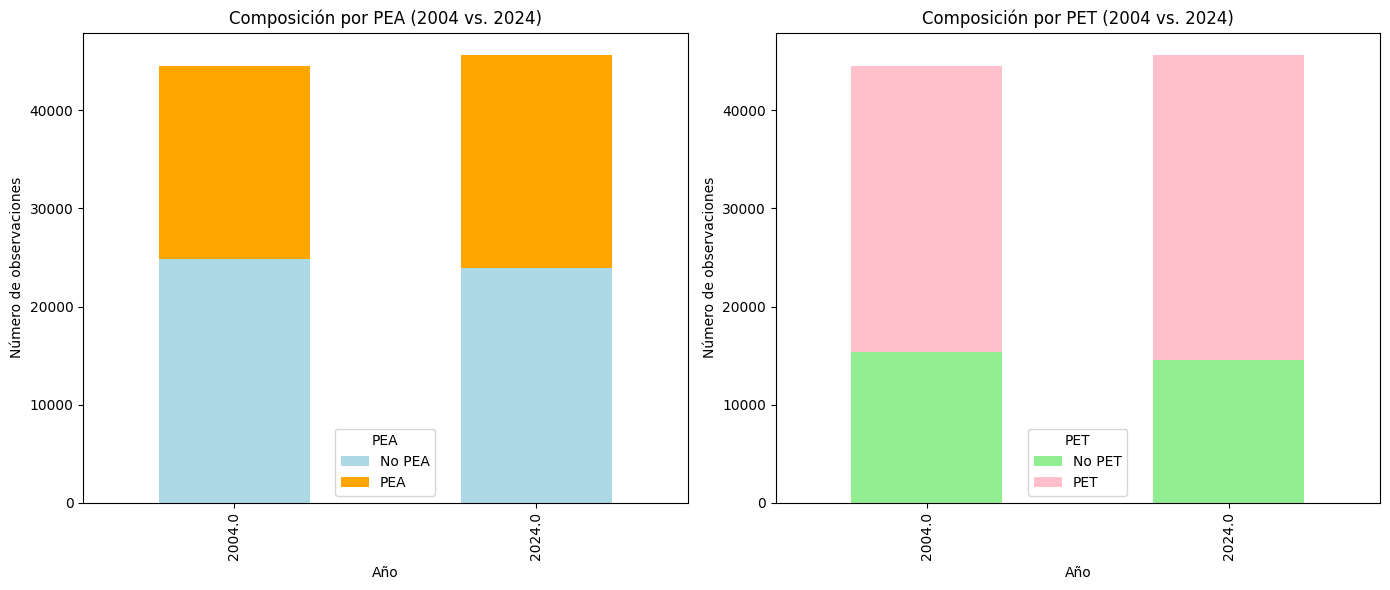

In [ ]:
"""
# Se agrega columna PET (Población en Edad para Trabajar)
respondieron['PET'] = respondieron['CH06'].apply(lambda x: 1 if 15 <= x <= 65 else 0)

# Agrupamos por año, PEA y PET
pet_composicion = respondieron.groupby(['ANO4', 'PET']).size().reset_index(name='count')

# Gráficos de barras
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Composición por PEA
pea_composicion = pea_pet_composicion.pivot_table(index='ANO4', columns='PEA', values='count', aggfunc='sum', fill_value=0)
pea_composicion.plot(kind='bar', stacked=True, ax=axes[0], color=['lightblue', 'orange'])
axes[0].set_title("Composición por PEA (2004 vs. 2024)")
axes[0].set_ylabel("Número de observaciones")
axes[0].set_xlabel("Año")
axes[0].legend(title="PEA", labels=["No PEA", "PEA"])

# Composición por PET
pet_composicion = pea_pet_composicion.pivot_table(index='ANO4', columns='PET', values='count', aggfunc='sum', fill_value=0)
pet_composicion.plot(kind='bar', stacked=True, ax=axes[1], color=['lightgreen', 'pink'])
axes[1].set_title("Composición por PET (2004 vs. 2024)")
axes[1].set_ylabel("Número de observaciones")
axes[1].set_xlabel("Año")
axes[1].legend(title="PET", labels=["No PET", "PET"])

plt.tight_layout()
plt.show()"""

import matplotlib.pyplot as plt

# Asegurarse de trabajar con una copia
respondieron = respondieron.copy()

# Se agrega columna PET (Población en Edad para Trabajar)
respondieron['PET'] = respondieron['CH06'].apply(lambda x: 1 if 15 <= x <= 65 else 0)

# Agrupamos por año, PEA y PET
pet_composicion = respondieron.groupby(['ANO4', 'PET']).size().reset_index(name='count')

# Gráficos de barras
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Composición por PEA (Si ya tienes una columna PEA definida)
pea_composicion = respondieron.groupby(['ANO4', 'PEA']).size().reset_index(name='count')
pea_composicion = pea_composicion.pivot_table(index='ANO4', columns='PEA', values='count', aggfunc='sum', fill_value=0)
pea_composicion.plot(kind='bar', stacked=True, ax=axes[0], color=['lightblue', 'orange'])
axes[0].set_title("Composición por PEA (2004 vs. 2024)")
axes[0].set_ylabel("Número de observaciones")
axes[0].set_xlabel("Año")
axes[0].legend(title="PEA", labels=["No PEA", "PEA"])

# Composición por PET
pet_composicion = pet_composicion.pivot_table(index='ANO4', columns='PET', values='count', aggfunc='sum', fill_value=0)
pet_composicion.plot(kind='bar', stacked=True, ax=axes[1], color=['lightgreen', 'pink'])
axes[1].set_title("Composición por PET (2004 vs. 2024)")
axes[1].set_ylabel("Número de observaciones")
axes[1].set_xlabel("Año")
axes[1].legend(title="PET", labels=["No PET", "PET"])

plt.tight_layout()
plt.show()

Se observa que la cantidad de personas pertenecientes a PET sigue la misma tendencia que la PEA, mostrando un aumento en comparación con 2004. Al mismo tiempo, se podría sugerir que la población no está envejeciendo.

## Punto 6

    6. Por ultimo, agreguen la base respondieron una columna llamada desocupado que tome 1 si esta desocupada. ¿Cuántas personas están desocupadas en 2004 vs 2024?
        a. (Opcional) Muestre la proporción de desocupados por nivel educativo comparando 2004 vs 2024. ¿Hubo cambios de desocupados por nivel educativo?
        b. (Opcional) Cree una variable categórica de años cumplidos (CH06) agrupada de a 10 años. Muestre proporción de desocupados por edad agrupada comparando 2004 vs 2024. ¿Hubo cambios de desocupados por edad?

In [ ]:
# Columna 'desocupado' en la base 'respondieron'
respondieron['desocupado'] = respondieron['ESTADO_NUM'].apply(lambda x: 1 if x == 2 else 0)

# Contar la cantidad de desocupados en 2004 vs 2024
desocupados_2004_2024 = respondieron[respondieron['ANO4'].isin([2004, 2024])]
desocupados_count = desocupados_2004_2024.groupby('ANO4')['desocupado'].sum()

print(f" la cantidad de desocupados por año es : {desocupados_count}")

 la cantidad de desocupados por año es : ANO4
2004.0    2717
2024.0    1362
Name: desocupado, dtype: int64


Punto 6.a (opcional)

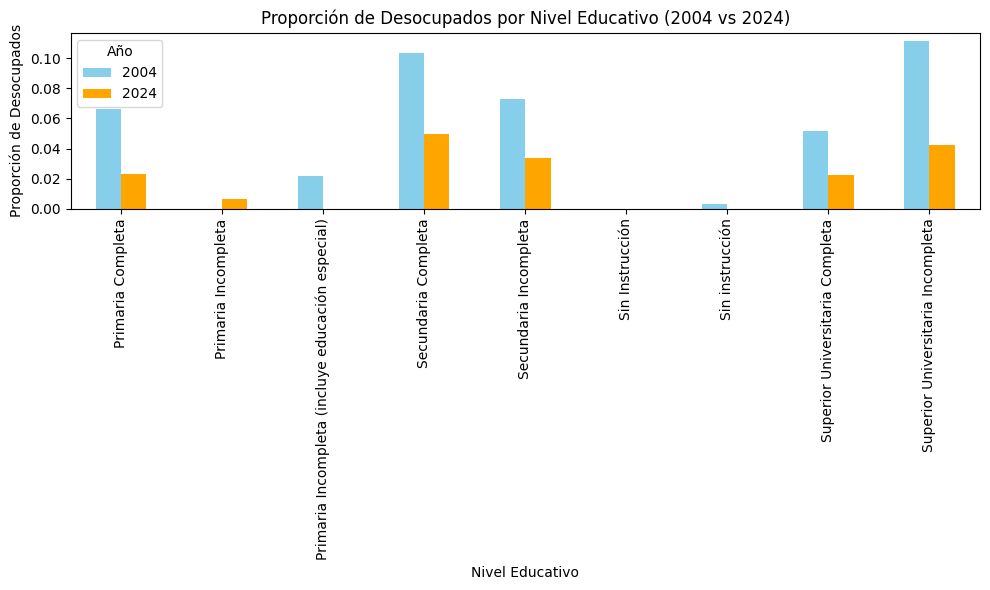

                                                      2004      2024
NIVEL_ED_DESC                                                       
Primaria Completa                                 0.065970  0.023392
Primaria Incompleta                                    NaN  0.006521
Primaria Incompleta (incluye educación especial)  0.021630       NaN
Secundaria Completa                               0.103302  0.049786
Secundaria Incompleta                             0.072756  0.033389
Sin Instrucción                                        NaN  0.000000
Sin instrucción                                   0.003199       NaN
Superior Universitaria Completa                   0.051369  0.022470
Superior Universitaria Incompleta                 0.111292  0.042042


In [ ]:
# Separo los años 2004 y 2024
respondieron_2004 = respondieron[respondieron['ANO4'] == 2004]
respondieron_2024 = respondieron[respondieron['ANO4'] == 2024]

# Proporción de desocupados por nivel educativo para 2004
desocupados_2004 = respondieron_2004.groupby('NIVEL_ED_DESC')['desocupado'].mean()

# Proporción de desocupados por nivel educativo para 2024
desocupados_2024 = respondieron_2024.groupby('NIVEL_ED_DESC')['desocupado'].mean()

# Unir los resultados en un DataFrame para comparación
desocupados_comparacion = pd.DataFrame({
    '2004': desocupados_2004,
    '2024': desocupados_2024
})

# Graficar la comparación de las proporciones
desocupados_comparacion.plot(kind='bar', stacked=False, figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Proporción de Desocupados por Nivel Educativo (2004 vs 2024)')
plt.ylabel('Proporción de Desocupados')
plt.xlabel('Nivel Educativo')
plt.xticks(rotation=90)
plt.legend(title='Año')
plt.tight_layout()
plt.show()

# Mostrar los resultados numéricos en consola
print(desocupados_comparacion)


Al comparar la desocupación por nivel educativo, se observa que, a excepción de las personas con educación primaria incompleta, la media de desocupación disminuyó considerablemente en todos los niveles educativos entre 2004 y 2024.

## Punto 7 (opcional)

(Opcional) Dos tasas de desocupación: calcule la tasa de desocupación para CABA en 2004 y 2024 siguiendo la definición del INDEC. En economía laboral, muchas veces se argumenta que participar del mercado laboral (PEA=1) es una decisión endógena de los individuos y no quisiéramos que el indicador de la tasa de desocupación varíe por dicha decisión. Calcule la tasa de desocupación alternativa como el porcentaje de desocupados respecto de la PET. Presente en una tabla o gráfico la tasa de desocupación del INDEC y de economía laboral para 2004 y 2024 y comente los resultados. ¿Cuáles son las ventajas y desventajas de dichas mediciones?

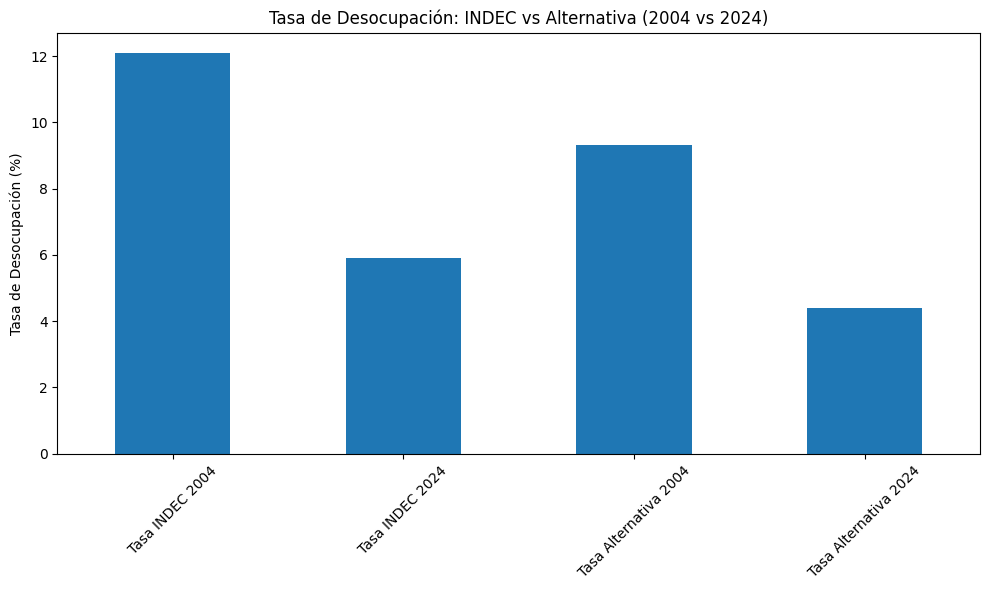

In [ ]:
# Separo los años 2004 y 2024
respondieron_2004 = respondieron[respondieron['ANO4'] == 2004]
respondieron_2024 = respondieron[respondieron['ANO4'] == 2024]

# Calcular los desocupados, PEA y PET para 2004
desocupados_2004 = respondieron_2004[respondieron_2004['desocupado'] == 1].shape[0]
ocupados_2004 = respondieron_2004[respondieron_2004['PEA'] == 1].shape[0]
PEA_2004 = desocupados_2004 + ocupados_2004
PET_2004 = respondieron_2004[(respondieron_2004['CH06'] >= 15) & (respondieron_2004['CH06'] <= 65)].shape[0]

# Calcular los desocupados, PEA y PET para 2024
desocupados_2024 = respondieron_2024[respondieron_2024['desocupado'] == 1].shape[0]
ocupados_2024 = respondieron_2024[respondieron_2024['PEA'] == 1].shape[0]
PEA_2024 = desocupados_2024 + ocupados_2024
PET_2024 = respondieron_2024[(respondieron_2024['CH06'] >= 15) & (respondieron_2024['CH06'] <= 65)].shape[0]

# Calcular la tasa de desocupación del INDEC
tasa_desocupacion_indec_2004 = desocupados_2004 / PEA_2004 * 100
tasa_desocupacion_indec_2024 = desocupados_2024 / PEA_2024 * 100

# Calcular la tasa de desocupación alternativa (basada en PET)
tasa_desocupacion_alternativa_2004 = desocupados_2004 / PET_2004 * 100
tasa_desocupacion_alternativa_2024 = desocupados_2024 / PET_2024 * 100

# Crear un DataFrame con los resultados
resultados_tasas = pd.DataFrame({
    'Tasa INDEC 2004': [tasa_desocupacion_indec_2004],
    'Tasa INDEC 2024': [tasa_desocupacion_indec_2024],
    'Tasa Alternativa 2004': [tasa_desocupacion_alternativa_2004],
    'Tasa Alternativa 2024': [tasa_desocupacion_alternativa_2024]
})

# Graficar las tasas con colores diferenciados para 2004 y 2024
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Diferentes colores para cada barra

resultados_tasas.T.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Tasa de Desocupación: INDEC vs Alternativa (2004 vs 2024)')
plt.ylabel('Tasa de Desocupación (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().get_legend().set_visible(False)

# Mostrar el gráfico
plt.show()

Por un lado, se podría argumentar que la tasa del INDEC sobreestima la desocupación; sin embargo, también se puede sostener que refleja una oferta real de trabajo, es decir, de personas que realmente están buscando empleo.
En contraste, la tasa alternativa parece reflejar únicamente a quienes no trabajan, sin considerar si están buscando empleo o no. Esta tasa no parece adecuada para la realidad argentina, donde muchas personas mayores de 65 años no reciben jubilación o, incluso al cobrarla, deben salir a trabajar. Lo mismo puede decirse de los menores de 15 años en diferentes zonas del país.

#Parte II: Clasificación

Para cada año, partan la base "respondieron" en una base de prueba (test) y una de entrenamiento (train) utilizando el comando train_test_split. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (random state instance) debe ser 101. Establezca a desocupado como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables serán las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [ ]:
# Importar bibliotecas necesarias
from sklearn.model_selection import train_test_split
import pandas as pd

# Función para homologar variables categóricas en variables numéricas usando encoding
def homogenize_categorical_variables(df):
    """
    Homologa las variables categóricas en un DataFrame a variables numéricas
    mediante encoding.

    Args:
        df (pd.DataFrame): DataFrame a procesar.

    Returns:
        pd.DataFrame: DataFrame procesado con variables categóricas convertidas.
    """
    # Detectar columnas categóricas
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns

    if not categorical_cols.empty:
        print(f"Columnas categóricas detectadas: {list(categorical_cols)}")
        # Convertir a variables numéricas con encoding
        df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    else:
        print("No se detectaron columnas categóricas.")

    return df

# Separar los datos por año
respondieron_2004 = respondieron[respondieron['ANO4'] == 2004].copy()
respondieron_2024 = respondieron[respondieron['ANO4'] == 2024].copy()

# Variables relevantes actualizadas
relevant_columns = ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'IPCF', 'desocupado']

# Filtrar columnas relevantes
respondieron_2004 = respondieron_2004[relevant_columns].dropna().copy()
respondieron_2024 = respondieron_2024[relevant_columns].dropna().copy()

# Homologar variables categóricas
respondieron_2004 = homogenize_categorical_variables(respondieron_2004)
respondieron_2024 = homogenize_categorical_variables(respondieron_2024)

# Variables independientes y dependientes para 2004
X_2004 = respondieron_2004.drop(columns=['desocupado'])
y_2004 = respondieron_2004['desocupado']

# Variables independientes y dependientes para 2024
X_2024 = respondieron_2024.drop(columns=['desocupado'])
y_2024 = respondieron_2024['desocupado']

# Agregar columna de unos (bias)
X_2004['bias'] = 1
X_2024['bias'] = 1

# Dividir en conjuntos de entrenamiento y prueba para 2004
X_train_2004, X_test_2004, y_train_2004, y_test_2004 = train_test_split(
    X_2004, y_2004, test_size=0.3, random_state=101, stratify=y_2004
)

# Dividir en conjuntos de entrenamiento y prueba para 2024
X_train_2024, X_test_2024, y_train_2024, y_test_2024 = train_test_split(
    X_2024, y_2024, test_size=0.3, random_state=101, stratify=y_2024
)

# Imprimir información de los conjuntos generados
print("=== Año 2004 ===")
print("Dimensiones de X_train_2004:", X_train_2004.shape)
print("Dimensiones de X_test_2004:", X_test_2004.shape)
print("Dimensiones de y_train_2004:", y_train_2004.shape)
print("Dimensiones de y_test_2004:", y_test_2004.shape)

print("\nDistribución de clases en y_train_2004:")
print(y_train_2004.value_counts())

print("\nDistribución de clases en y_test_2004:")
print(y_test_2004.value_counts())

print("\n=== Año 2024 ===")
print("Dimensiones de X_train_2024:", X_train_2024.shape)
print("Dimensiones de X_test_2024:", X_test_2024.shape)
print("Dimensiones de y_train_2024:", y_train_2024.shape)
print("Dimensiones de y_test_2024:", y_test_2024.shape)

print("\nDistribución de clases en y_train_2024:")
print(y_train_2024.value_counts())

print("\nDistribución de clases en y_test_2024:")
print(y_test_2024.value_counts())


Columnas categóricas detectadas: ['CH04', 'CH07', 'CH08', 'NIVEL_ED']
Columnas categóricas detectadas: ['CH04', 'CH07', 'CH08', 'NIVEL_ED']
=== Año 2004 ===
Dimensiones de X_train_2004: (31187, 23)
Dimensiones de X_test_2004: (13367, 23)
Dimensiones de y_train_2004: (31187,)
Dimensiones de y_test_2004: (13367,)

Distribución de clases en y_train_2004:
desocupado
0    29285
1     1902
Name: count, dtype: int64

Distribución de clases en y_test_2004:
desocupado
0    12552
1      815
Name: count, dtype: int64

=== Año 2024 ===
Dimensiones de X_train_2024: (31944, 22)
Dimensiones de X_test_2024: (13691, 22)
Dimensiones de y_train_2024: (31944,)
Dimensiones de y_test_2024: (13691,)

Distribución de clases en y_train_2024:
desocupado
0    30991
1      953
Name: count, dtype: int64

Distribución de clases en y_test_2024:
desocupado
0    13282
1      409
Name: count, dtype: int64



=== Regresión Logística - Año 2004 ===
Matriz de Confusión:
[[12552     0]
 [  815     0]]

Accuracy: 0.9390289518964614

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     12552
           1       0.00      0.00      0.00       815

    accuracy                           0.94     13367
   macro avg       0.47      0.50      0.48     13367
weighted avg       0.88      0.94      0.91     13367


AUC-ROC: 0.7645442566286212


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


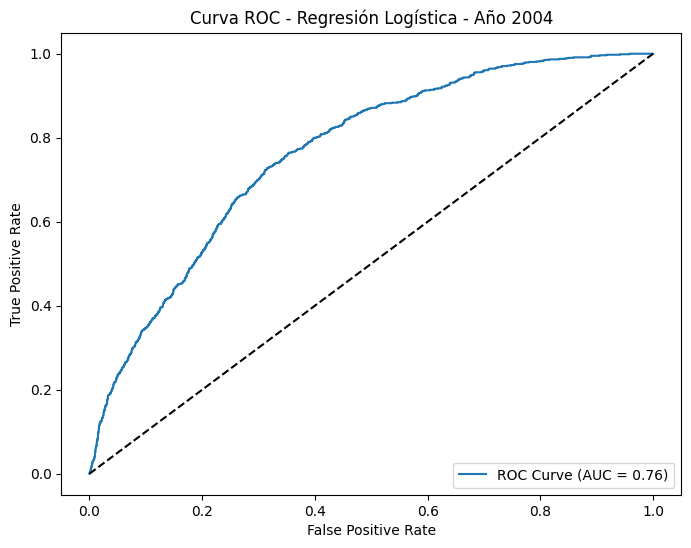

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre


=== Regresión Logística - Año 2024 ===
Matriz de Confusión:
[[13282     0]
 [  409     0]]

Accuracy: 0.9701263603827331

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     13282
           1       0.00      0.00      0.00       409

    accuracy                           0.97     13691
   macro avg       0.49      0.50      0.49     13691
weighted avg       0.94      0.97      0.96     13691


AUC-ROC: 0.7955260699904902


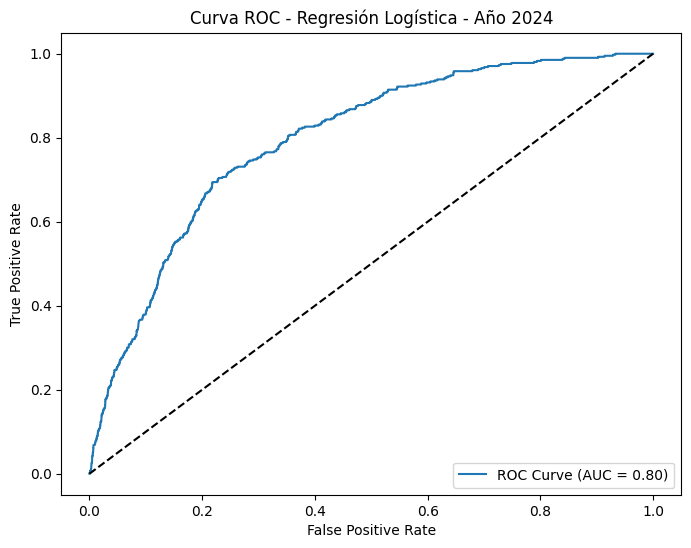

In [ ]:
# Importar bibliotecas necesarias
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Función para entrenar y evaluar el modelo de regresión logística
def evaluate_logistic_regression(X_train, y_train, X_test, y_test, year):
    model = LogisticRegression(max_iter=1000, random_state=101)
    model.fit(X_train, y_train)

    # Predicciones
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Métricas
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Reporte
    print(f"\n=== Regresión Logística - Año {year} ===")
    print("Matriz de Confusión:")
    print(cm)
    print("\nAccuracy:", acc)
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred))
    print("\nAUC-ROC:", roc_auc)

    # Gráfica de Curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Curva ROC - Regresión Logística - Año {year}')
    plt.legend(loc='lower right')
    plt.show()

# Evaluar para 2004 y 2024
try:
    evaluate_logistic_regression(X_train_2004, y_train_2004, X_test_2004, y_test_2004, 2004)
    evaluate_logistic_regression(X_train_2024, y_train_2024, X_test_2024, y_test_2024, 2024)
except NameError as e:
    print(f"Error: {e}")
    print("Por favor, asegúrate de que las variables X_train, y_train, X_test, y_test están definidas correctamente.")


  ◦ Implementen los siguientes métodos reportando luego la matriz de confusión, la curva ROC, los valores de AUC y de Accuracy de cada uno:
 • Análisis discriminante lineal


=== Análisis Discriminante Lineal - Año 2004 ===
Matriz de Confusión:
[[12552     0]
 [  815     0]]

Accuracy: 0.9390289518964614

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     12552
           1       0.00      0.00      0.00       815

    accuracy                           0.94     13367
   macro avg       0.47      0.50      0.48     13367
weighted avg       0.88      0.94      0.91     13367


AUC-ROC: 0.7510350072532619


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


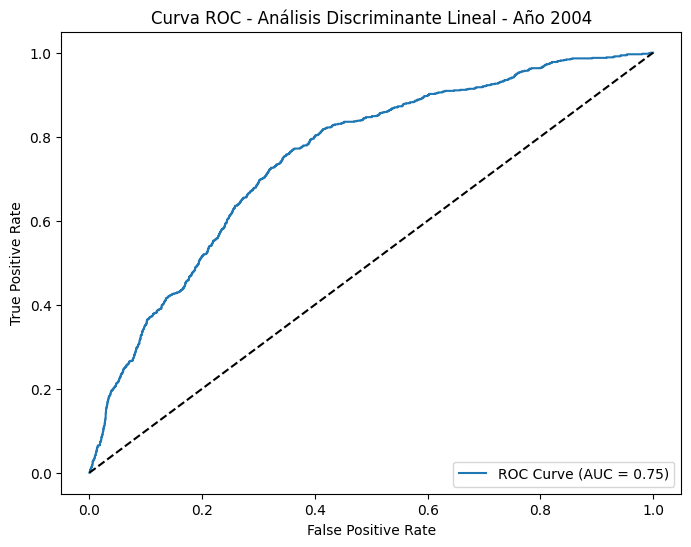


=== Análisis Discriminante Lineal - Año 2024 ===
Matriz de Confusión:
[[13282     0]
 [  409     0]]

Accuracy: 0.9701263603827331

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     13282
           1       0.00      0.00      0.00       409

    accuracy                           0.97     13691
   macro avg       0.49      0.50      0.49     13691
weighted avg       0.94      0.97      0.96     13691


AUC-ROC: 0.7905898896570868


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


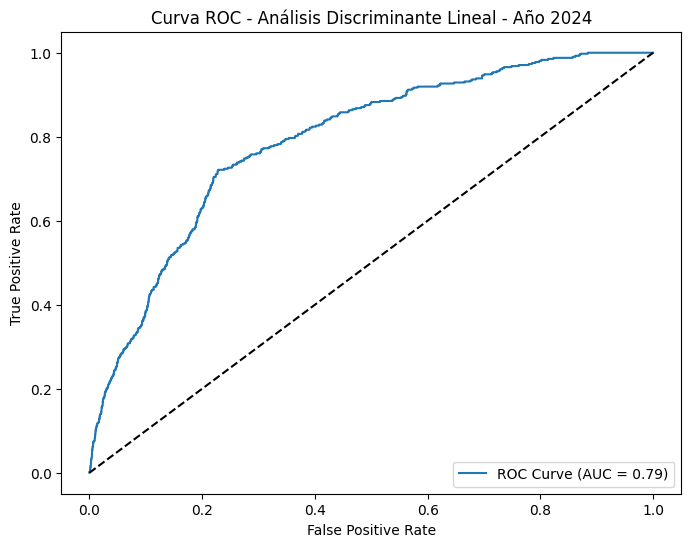

In [ ]:
# Importar bibliotecas necesarias
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Función para entrenar y evaluar el modelo de Análisis Discriminante Lineal
def evaluate_lda(X_train, y_train, X_test, y_test, year):
    # Crear y entrenar el modelo
    model = LinearDiscriminantAnalysis()
    model.fit(X_train, y_train)

    # Predicciones
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades para curva ROC

    # Métricas
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Reporte
    print(f"\n=== Análisis Discriminante Lineal - Año {year} ===")
    print("Matriz de Confusión:")
    print(cm)
    print("\nAccuracy:", acc)
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred))
    print("\nAUC-ROC:", roc_auc)

    # Graficar Curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Curva ROC - Análisis Discriminante Lineal - Año {year}')
    plt.legend(loc='lower right')
    plt.show()

# Evaluar el modelo para 2004 y 2024
try:
    evaluate_lda(X_train_2004, y_train_2004, X_test_2004, y_test_2004, 2004)
    evaluate_lda(X_train_2024, y_train_2024, X_test_2024, y_test_2024, 2024)
except Exception as e:
    print(f"Error: {e}")
    print("Por favor, verifica las dimensiones y los datos de entrada.")


Código para KNN con
𝑘
=
3
k=3


=== KNN (k=3) - Año 2004 ===
Matriz de Confusión:
[[12315   237]
 [  738    77]]

Accuracy: 0.9270591755816563

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     12552
           1       0.25      0.09      0.14       815

    accuracy                           0.93     13367
   macro avg       0.59      0.54      0.55     13367
weighted avg       0.90      0.93      0.91     13367


AUC-ROC: 0.6173517186907373


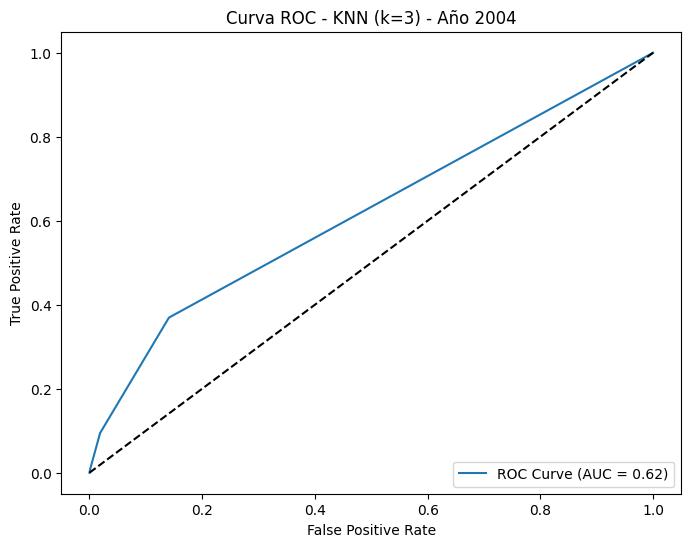


=== KNN (k=3) - Año 2024 ===
Matriz de Confusión:
[[13192    90]
 [  394    15]]

Accuracy: 0.9646483091081732

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     13282
           1       0.14      0.04      0.06       409

    accuracy                           0.96     13691
   macro avg       0.56      0.51      0.52     13691
weighted avg       0.95      0.96      0.95     13691


AUC-ROC: 0.5639146533223817


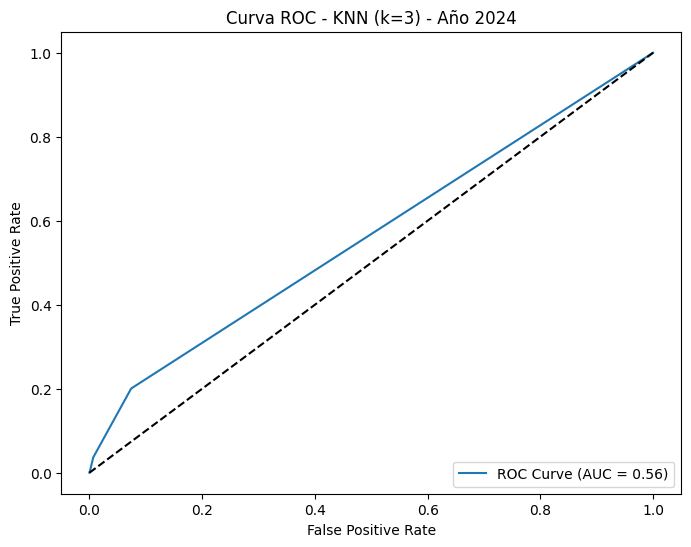

In [ ]:
# Importar bibliotecas necesarias
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Función para entrenar y evaluar el modelo KNN
def evaluate_knn(X_train, y_train, X_test, y_test, year, k=3):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    # Predicciones
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Métricas
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
    else:
        roc_auc = None

    # Reporte
    print(f"\n=== KNN (k={k}) - Año {year} ===")
    print("Matriz de Confusión:")
    print(cm)
    print("\nAccuracy:", acc)
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred))
    if roc_auc is not None:
        print("\nAUC-ROC:", roc_auc)

    # Gráfica de Curva ROC
    if roc_auc is not None:
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Curva ROC - KNN (k={k}) - Año {year}')
        plt.legend(loc='lower right')
        plt.show()

# Evaluar para 2004 y 2024
evaluate_knn(X_train_2004, y_train_2004, X_test_2004, y_test_2004, year=2004, k=3)
evaluate_knn(X_train_2024, y_train_2024, X_test_2024, y_test_2024, year=2024, k=3)


Naive Bayes


=== Naive Bayes - Año 2004 ===
Matriz de Confusión:
[[8096 4456]
 [ 212  603]]

Accuracy: 0.6507817760155608

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.64      0.78     12552
           1       0.12      0.74      0.21       815

    accuracy                           0.65     13367
   macro avg       0.55      0.69      0.49     13367
weighted avg       0.92      0.65      0.74     13367


AUC-ROC: 0.7355928417537645


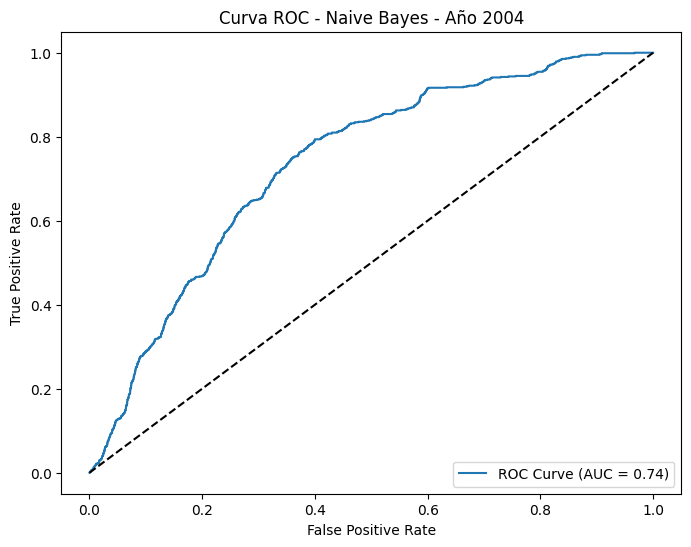


=== Naive Bayes - Año 2024 ===
Matriz de Confusión:
[[13282     0]
 [  409     0]]

Accuracy: 0.9701263603827331

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     13282
           1       0.00      0.00      0.00       409

    accuracy                           0.97     13691
   macro avg       0.49      0.50      0.49     13691
weighted avg       0.94      0.97      0.96     13691


AUC-ROC: 0.7419594472950689


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


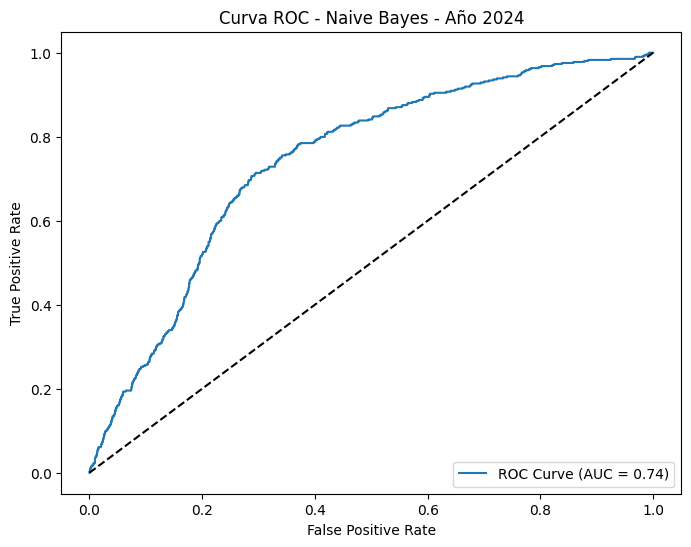

In [ ]:
# Importar bibliotecas necesarias
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Función para entrenar y evaluar el modelo Naive Bayes
def evaluate_naive_bayes(X_train, y_train, X_test, y_test, year):
    model = GaussianNB()
    model.fit(X_train, y_train)

    # Predicciones
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Métricas
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
    else:
        roc_auc = None

    # Reporte
    print(f"\n=== Naive Bayes - Año {year} ===")
    print("Matriz de Confusión:")
    print(cm)
    print("\nAccuracy:", acc)
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred))
    if roc_auc is not None:
        print("\nAUC-ROC:", roc_auc)

    # Gráfica de Curva ROC
    if roc_auc is not None:
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Curva ROC - Naive Bayes - Año {year}')
        plt.legend(loc='lower right')
        plt.show()

# Evaluar para 2004 y 2024
evaluate_naive_bayes(X_train_2004, y_train_2004, X_test_2004, y_test_2004, year=2004)
evaluate_naive_bayes(X_train_2024, y_train_2024, X_test_2024, y_test_2024, year=2024)
